In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


# Начало работы - импортируем необходимые библиотеки

In [5]:
import matplotlib.pyplot as plt # библиотека на языке Python для визуализации данных

plt.style.use('dark_background')

import numpy as np # библиотека для научных вычислений (обработки набора чисел)
import pandas as pd # работа со структурами DataFrame и Series
import seaborn as sns # библиотека для создания статистических графиков на Python. Она основывается на matplotlib
import datetime
import sys # модуль, который предоставляет доступ к некоторым переменным и функциям для получения информации о взаимодействии интерпретатора Python с операционной системой

np.set_printoptions(precision=3, suppress=True) #определяют способ отображения чисел с плавающей запятой, массивов и других
# устанавливаем точность 3 для numpy

import tensorflow as tf # необходимо для машинного обучения

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import copy

from sklearn import preprocessing
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest




from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score



2.9.1


# Загружаем данные из таблицы "X_bp"

In [6]:
df_bp = pd.read_excel("c:\df\X_bp.xlsx",index_col=0)


In [7]:
df_bp #отображение результатов

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

В представленой таблице представлены 1023 строки и 10 колонок

# Загружаем данные из таблицы "X_nup"

In [8]:
df_nup = pd.read_excel("c:\df\X_nup.xlsx",index_col=0)

In [9]:
df_nup #отображение результатов

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

В данном дата фрейме у нас представлена таблица, состоящия из 1040 строк и 3 колонок

# Из условий задачи необходимо произвести обьединение таблиц по индексу - тип объединения INNER

In [10]:
df = df_nup.join(df_bp,  how='inner'); # тип объединения — пересечение или объединение индексов/колонок;

In [11]:
df

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0.0                    0.0     4.000000          57.000000   
1.0                    0.0     4.000000          60.000000   
2.0                    0.0     4.000000          70.000000   
3.0                    0.0     5.000000          47.000000   
4.0                    0.0     5.000000          57.000000   
...                    ...          ...                ...   
1018.0                90.0     9.076380          47.019770   
1019.0                90.0    10.565614          53.750790   
1020.0                90.0     4.161154          67.629684   
1021.0                90.0     6.313201          58.261074   
1022.0                90.0     6.078902          77.434468   

        Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

       

В результате обьединения имеющихся у нас таблиц (к Bp присоеденили Nup) - мы получили дата фрейм, состоящий из 1023 строк и 13 колонок

In [12]:
df.info() # информация в получившимся дата фрейме. Получения краткой сводки данных. 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

Уникальность значений в колонках, выведем на экран последние 10 значений

In [13]:
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.3748547768973, 13.378772113231, 13.4849451024425, 13.5719207023593, 13.6539870540166, 13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[85.6609961909375, 85.9871737934485, 86.0124270098611, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2160.0, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.67721742116, 1615.09697286127, 1628

# Работа с пропусками данных

In [14]:
df.isna().sum() # сумма пропусков
df.isna().mean() # процент проаусков

Угол нашивки, град                      0.0
Шаг нашивки                             0.0
Плотность нашивки                       0.0
Соотношение матрица-наполнитель         0.0
Плотность, кг/м3                        0.0
модуль упругости, ГПа                   0.0
Количество отвердителя, м.%             0.0
Содержание эпоксидных групп,%_2         0.0
Температура вспышки, С_2                0.0
Поверхностная плотность, г/м2           0.0
Модуль упругости при растяжении, ГПа    0.0
Прочность при растяжении, МПа           0.0
Потребление смолы, г/м2                 0.0
dtype: float64

In [15]:
df.duplicated().sum() # Проверка на дубликаты

0

Как мы видем из таблицы - результата, представленного выше, незаполненных параметров в нашей таблице нет

# Из условий проведения ВКР необходимо провести для каждой колонки получить среднее, медианное значение и тд

In [16]:
 df.describe() # описательная статистика

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count         1023.000000  1023.000000        1023.000000   
mean            44.252199     6.899222          57.153929   
std             45.015793     2.563467          12.350969   
min              0.000000     0.000000           0.000000   
25%              0.000000     5.080033          49.799212   
50%              0.000000     6.916144          57.341920   
75%             90.000000     8.586293          64.944961   
max             90.000000    14.440522         103.988901   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

Проведем несколько проверочных вычислений, что бы убедиться, что  df.describe() работает исправно

In [20]:
df["Угол нашивки, град"].mean() # среднее корректно

44.252199413489734

In [21]:
df["Содержание эпоксидных групп,%_2"].max() # максимальное значение корректно

33.0

In [22]:
df["Прочность при растяжении, МПа"].std() # среднеквадратичное значение корректно

485.62800627853596

In [23]:
 df.columns #выводим наименования имеющихся у нас колонок

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

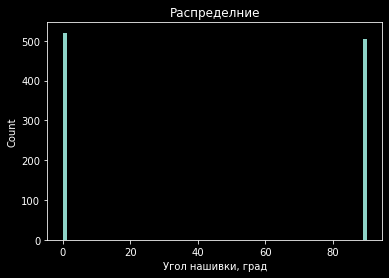

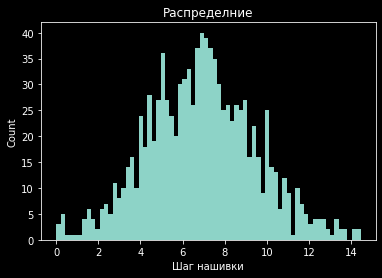

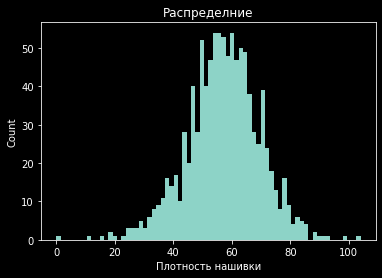

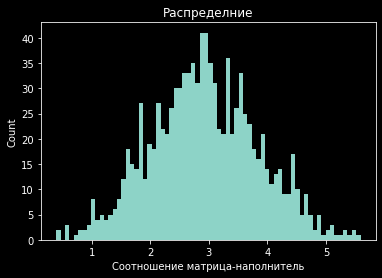

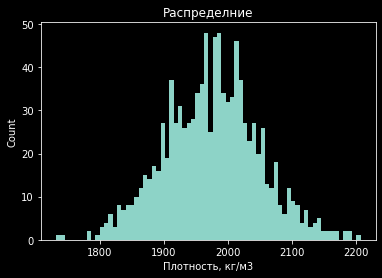

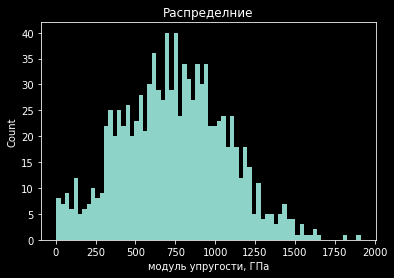

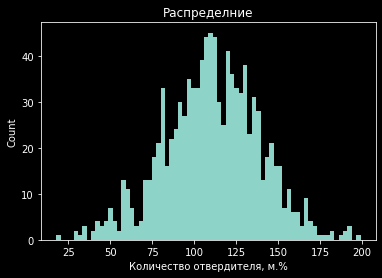

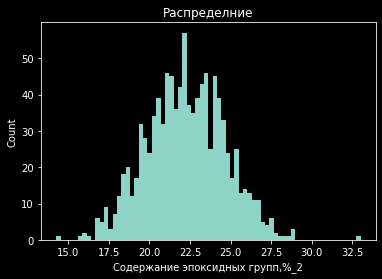

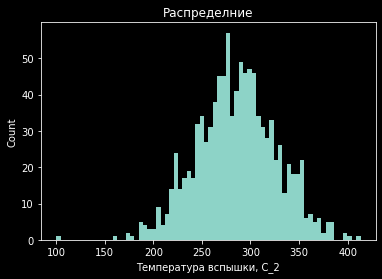

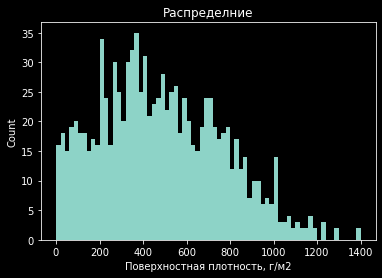

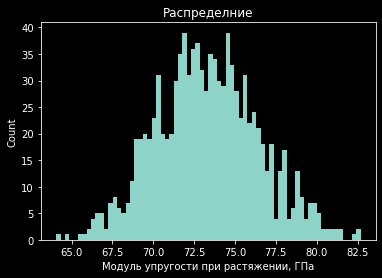

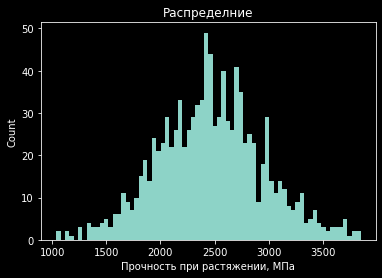

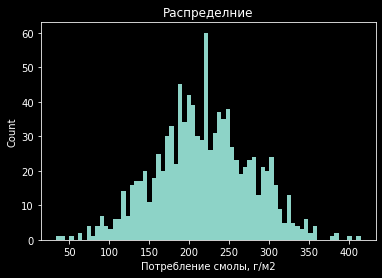

In [24]:
for col in df.columns: # Гистограммы распределения (двигаемя по порядку индексов)
    
    plt.title("Распределние")
    plt.xlabel(col) #подписи осей
    plt.ylabel("Count") # подписи осей
    plt.hist(df[col], bins = 70)
    plt.show()

Для большинства характеристик распределение близко к нормальному. Исключение составляют:
1. Поверхностная плотность, г/м2 - распределение со смещением;
2. Угол нашивки, град;

# Построение диаграмм размаха - "Ящик с усами"

"Ящик с усами" - график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

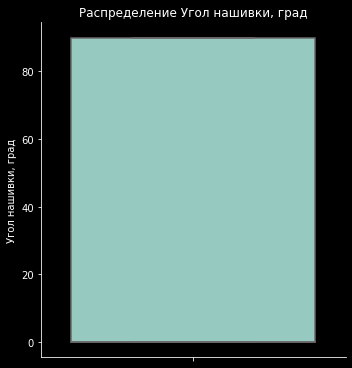

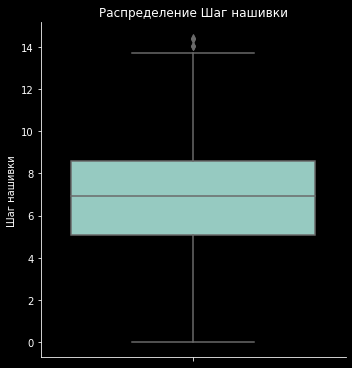

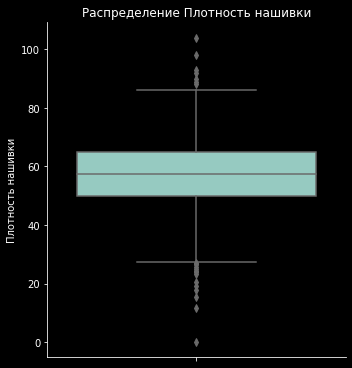

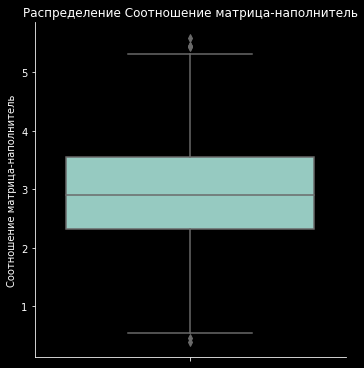

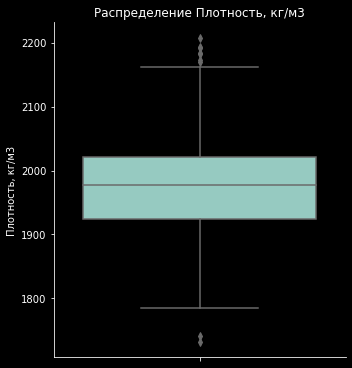

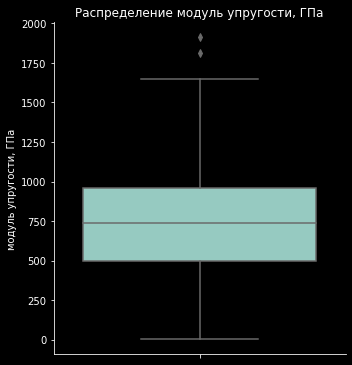

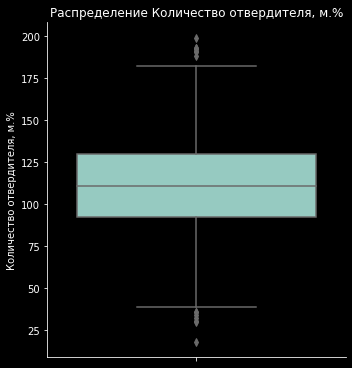

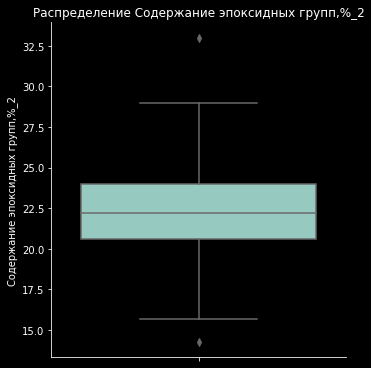

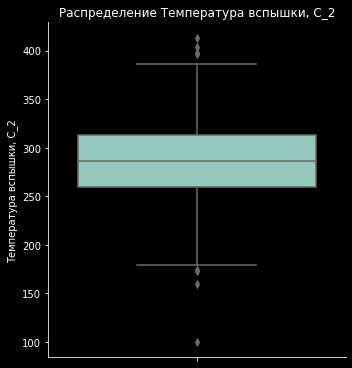

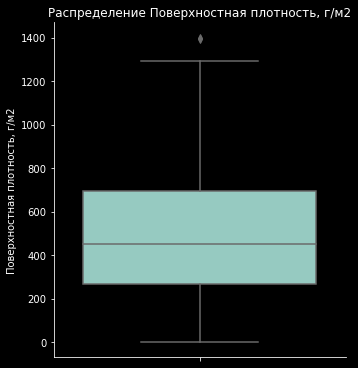

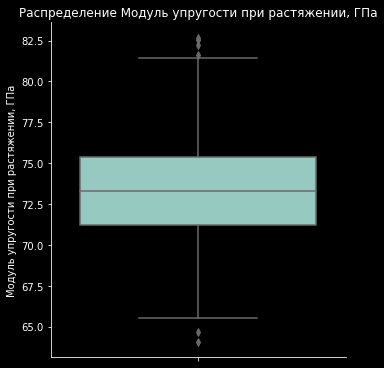

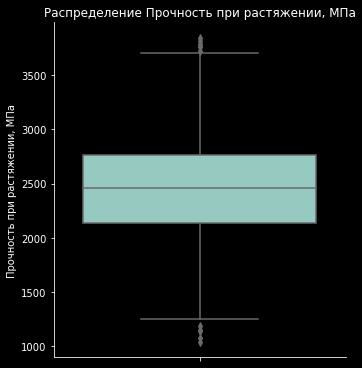

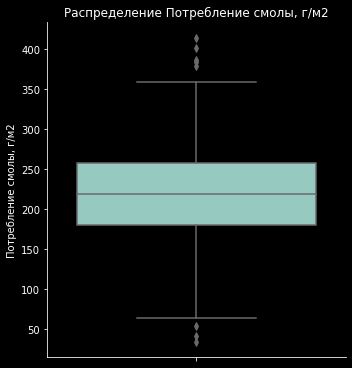

In [25]:
for col in df.columns: 
    sns.catplot(y = col, data = df, kind = 'box', height=5)
    plt.title("Распределение " + str(col))
   

По диаграммам присутствуют выбросы по всем характеристикам, кроме:
1. угла нашивки, для которого эта диаграмма неинформативна

In [26]:
df.describe().transpose()[['mean', '50%']] #Средне и медианное значения


mean          50%
Угол нашивки, град                      44.252199     0.000000
Шаг нашивки                              6.899222     6.916144
Плотность нашивки                       57.153929    57.341920
Соотношение матрица-наполнитель          2.930366     2.906878
Плотность, кг/м3                      1975.734888  1977.621657
модуль упругости, ГПа                  739.923233   739.664328
Количество отвердителя, м.%            110.570769   110.564840
Содержание эпоксидных групп,%_2         22.244390    22.230744
Температура вспышки, С_2               285.882151   285.896812
Поверхностная плотность, г/м2          482.731833   451.864365
Модуль упругости при растяжении, ГПа    73.328571    73.268805
Прочность при растяжении, МПа         2466.922843  2459.524526
Потребление смолы, г/м2                218.423144   219.198882

# Построение попарных графиков рассеивания точек

Воспользуемся функцией Seaborn Pairplot позволяет пользователям создавать сетку осей,
через которую каждая числовая переменная, хранящаяся в данных, распределяется по осям X и Y в структуре столбцов и строк.
Мы можем создать точечные графики, чтобы отображать попарные отношения в дополнение к графику распределения,
отображающему распределение данных в столбце по диагонали.


Построение точечных графиков, чтобы показать попарные отношения в дополнение к графику распределения (выше),
отображающему распределение данных в столбце по диагонали.

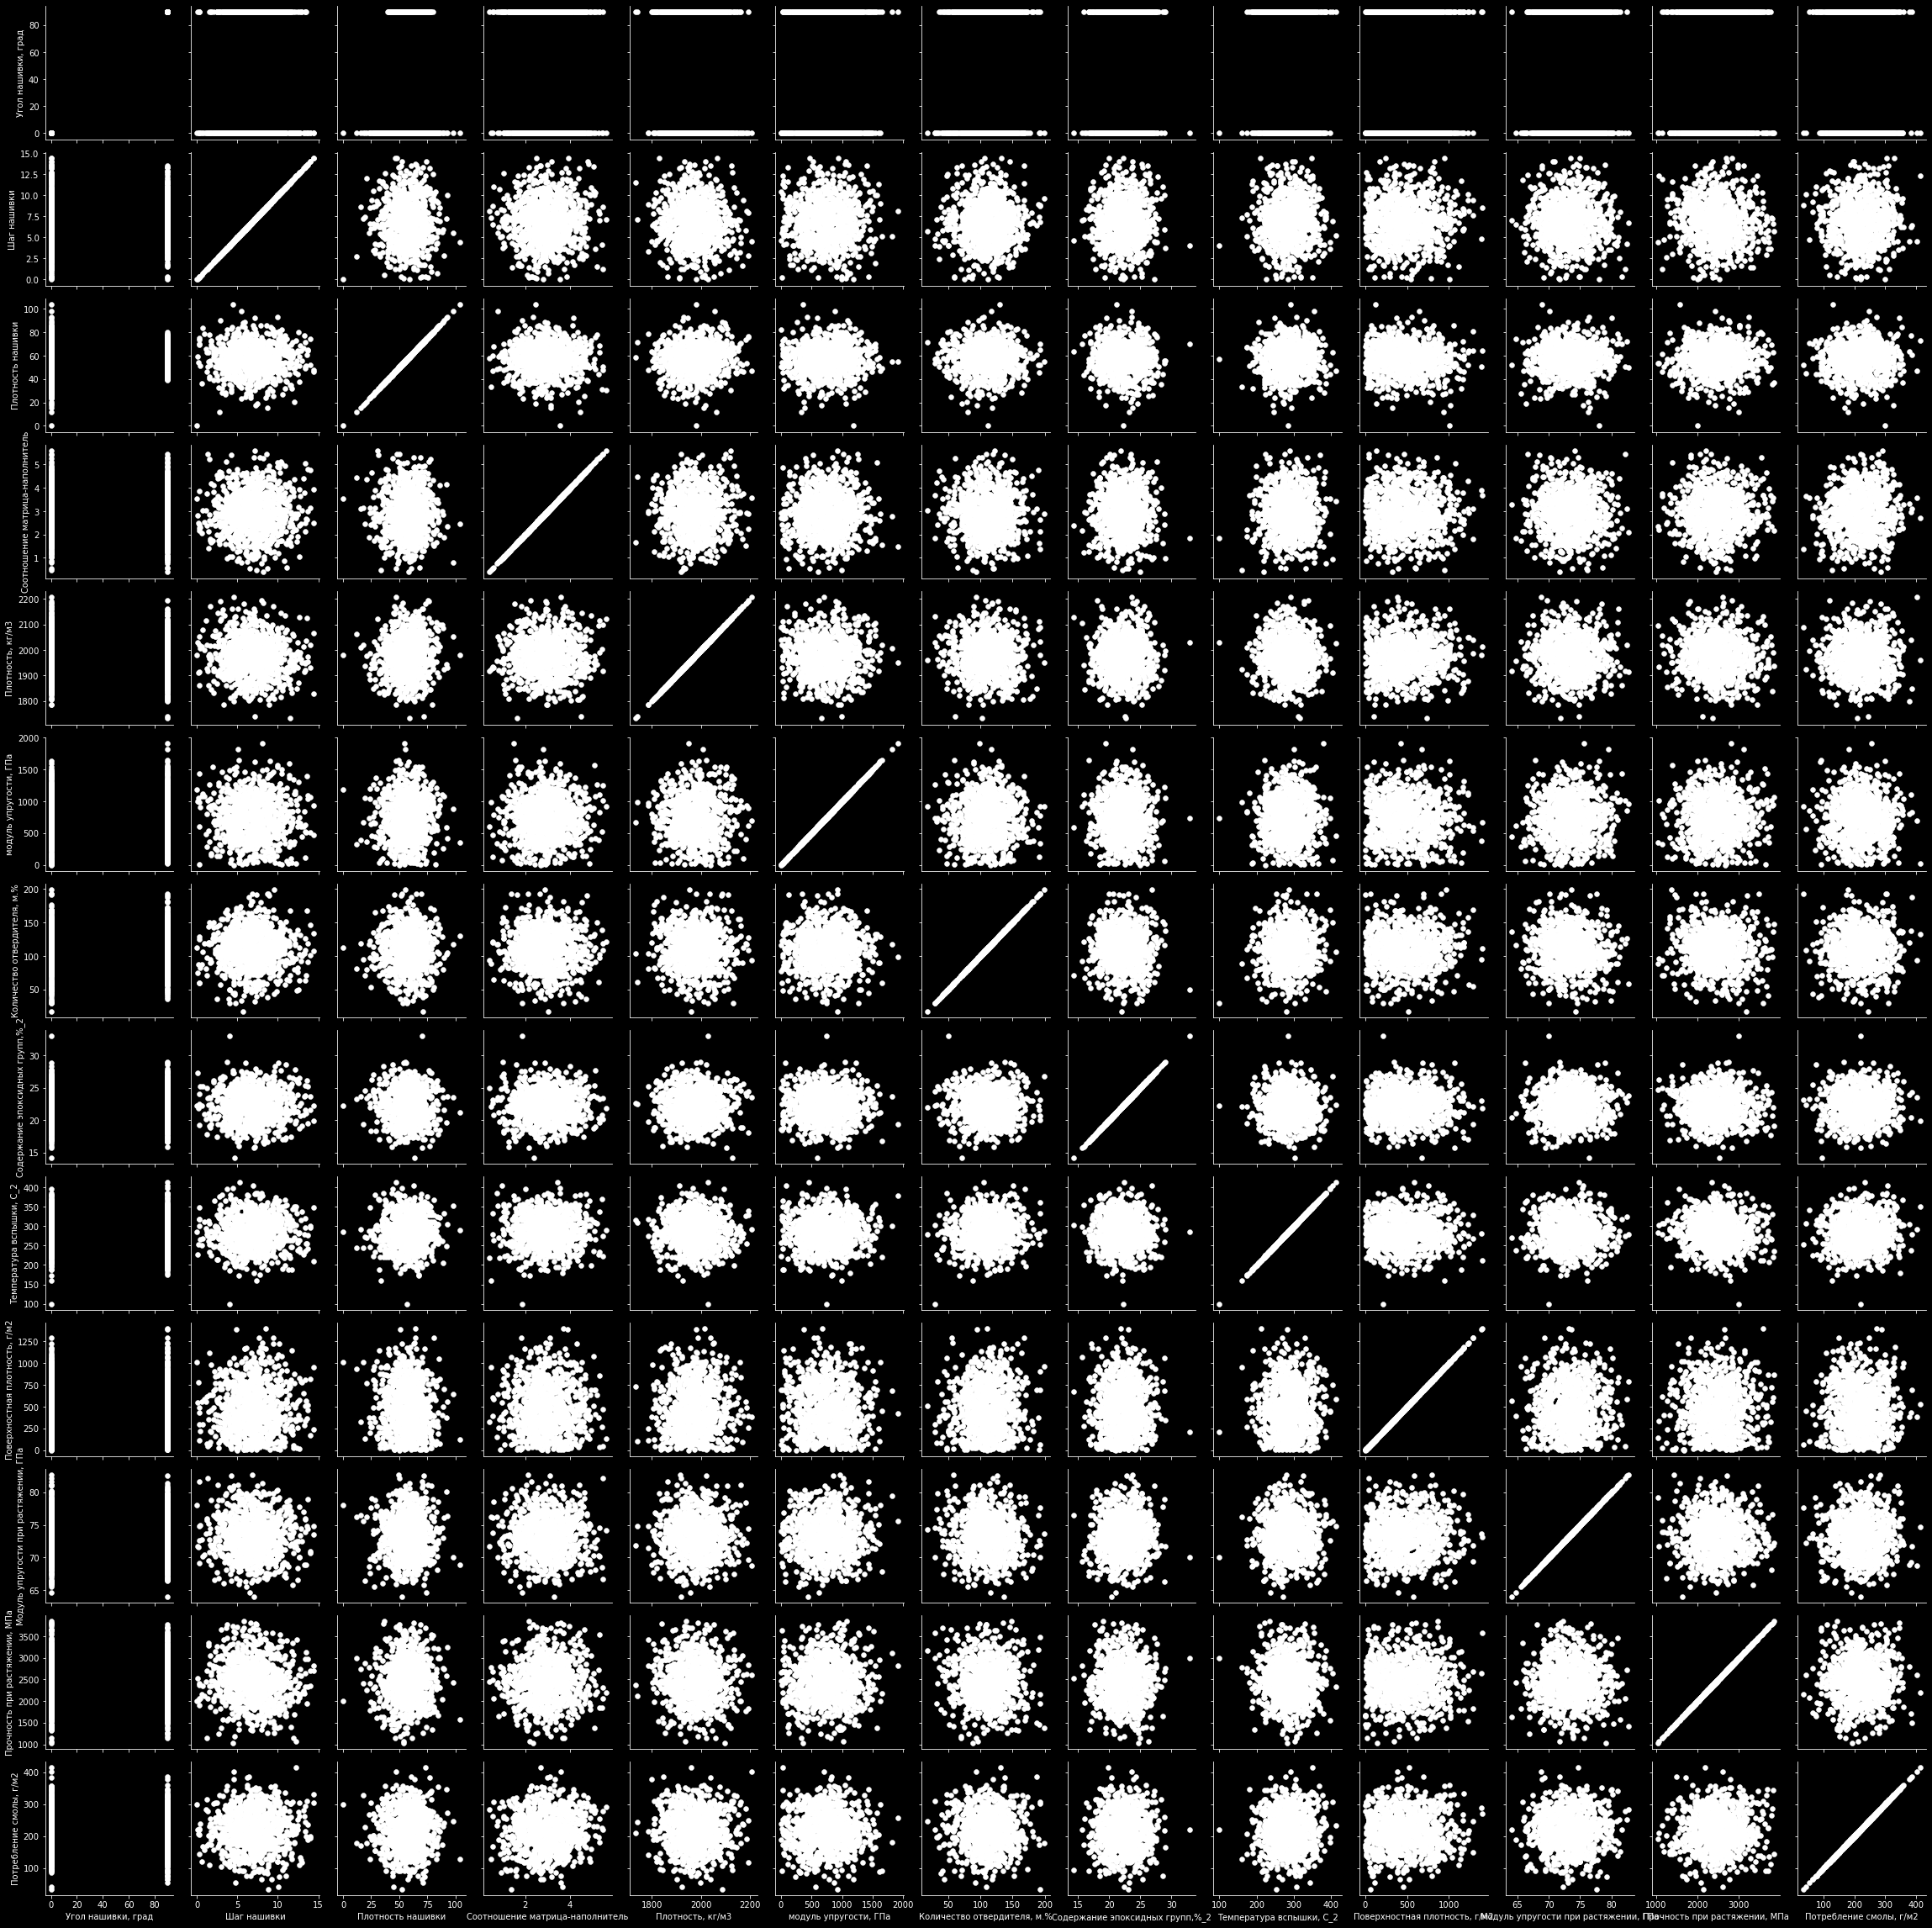

In [27]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='white')

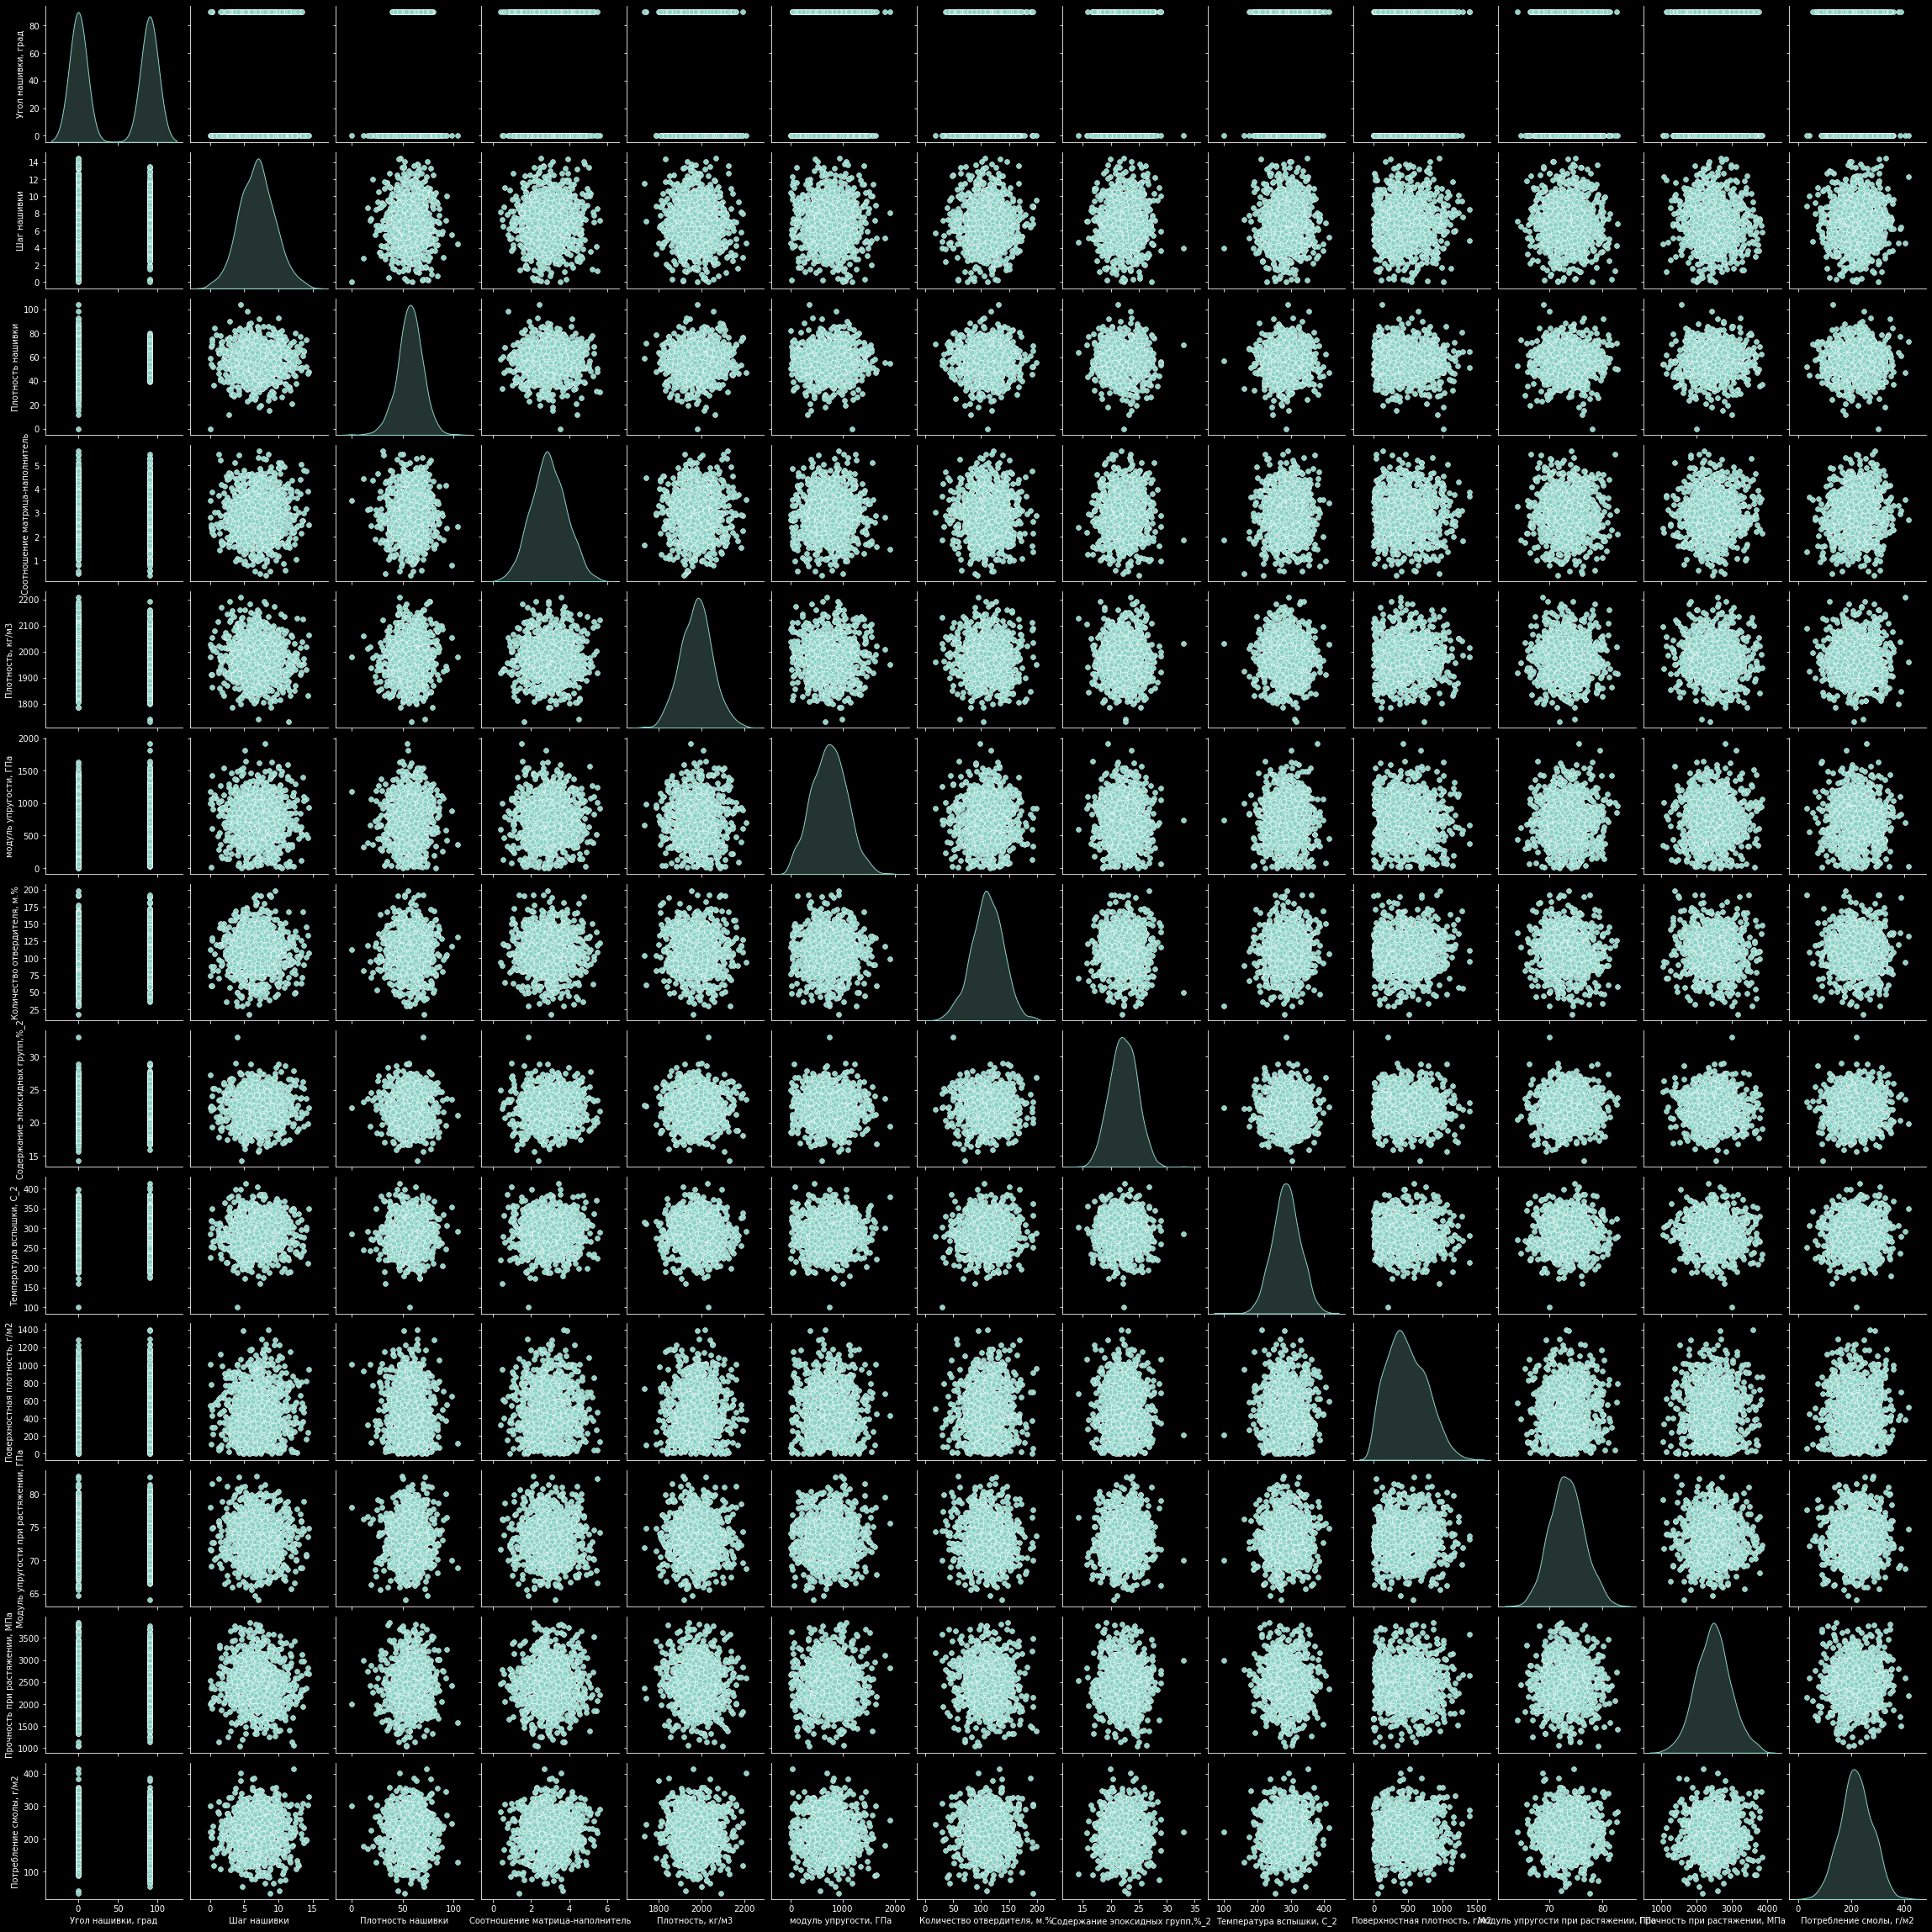

In [28]:
sns.pairplot(df[df.columns],
    diag_kind='kde');
# kde - это построение с помощью ядер оценки плотности распределения/по диоганали


Графики показывают очень слабую зависимость между переменными, возможно данные связывает сложная, нелинейная зависимость  

# Исследование массива с применением коэффициента корреляции

Процесс, как переменные в наборе данных связаны друг с другом и как они перемещаются относительно друг друга.
Значение корреляции колеблется от -1 до +1. 0 Корреляция означает, что две переменные не зависят друг от друга.
Положительная корреляция указывает на то, что переменные движутся в одном направлении,
а отрицательная корреляция указывает на противоположное.

In [29]:
df.corr()

Угол нашивки, град  Шаг нашивки  \
Угол нашивки, град                              1.000000     0.023616   
Шаг нашивки                                     0.023616     1.000000   
Плотность нашивки                               0.107947     0.003487   
Соотношение матрица-наполнитель                -0.031073     0.036437   
Плотность, кг/м3                               -0.068474    -0.061015   
модуль упругости, ГПа                          -0.025417    -0.009875   
Количество отвердителя, м.%                     0.038570     0.014887   
Содержание эпоксидных групп,%_2                 0.008052     0.003022   
Температура вспышки, С_2                        0.020695     0.025795   
Поверхностная плотность, г/м2                   0.052299     0.038332   
Модуль упругости при растяжении, ГПа            0.023003    -0.029468   
Прочность при растяжении, МПа                   0.023398    -0.059547   
Потребление смолы, г/м2                        -0.015334     0.013394   

                                      Плотность нашивки  \
Угол нашивки, град                             0.107947   
Шаг нашивки                                    0.003487   
Плотность нашивки                              1.000000   
Соотношение матрица-наполнитель               -0.004652   
Плотность, кг/м3                               0.080304   
модуль упругости, ГПа                          0.056346   
Количество отвердителя, м.%                    0.017248   
Содержание эпоксидных групп,%_2               -0.039073   
Температура вспышки, С_2                       0.011391   
Поверхностная плотность, г/м2                 -0.049923   
Модуль упругости при растяжении, ГПа           0.006476   
Прочность при растяжении, МПа                  0.019604   
Потребление смолы, г/м2                        0.012239   

                                      Соотношение матрица-наполнитель  \
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   

                              

# Тепловая карта коэффициента корреляции

Тепловая карта используется для графического представления значений матрицы с разными цветовыми оттенками для разных значений.
Он очень четко визуализирует общую матрицу.

<AxesSubplot:>

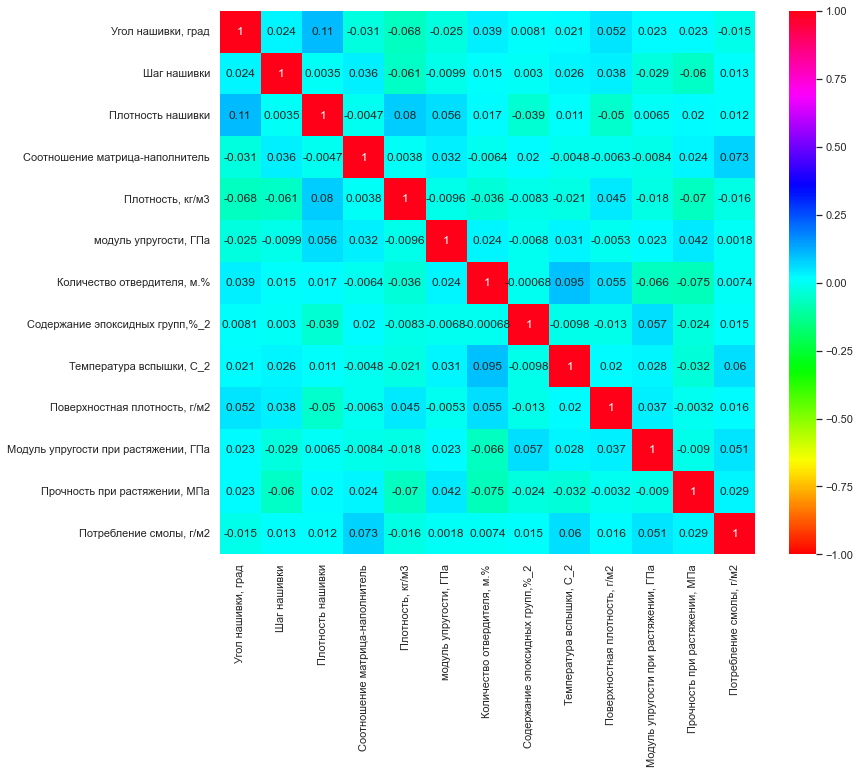

In [30]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'hsv')

Тепловая карта хорошо демонстрирует отсутствие корреляция у переменных предоставленного дата фрейма.
Большинство коэффициентов корреляции находятся в помежутке значений от - 0,25 до 0,25.
Одним из предположительных выводов данной ситуации может быть следующим. Представленный детасет был предобработан заказчиком и оставшиеся переменные являются независимыми, каждая из них несет свою функцию при влиянии на композитный материал.

In [31]:
# Сохранение датафрейма
df_copy = df.copy(deep=True)
df

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0.0                    0.0     4.000000          57.000000   
1.0                    0.0     4.000000          60.000000   
2.0                    0.0     4.000000          70.000000   
3.0                    0.0     5.000000          47.000000   
4.0                    0.0     5.000000          57.000000   
...                    ...          ...                ...   
1018.0                90.0     9.076380          47.019770   
1019.0                90.0    10.565614          53.750790   
1020.0                90.0     4.161154          67.629684   
1021.0                90.0     6.313201          58.261074   
1022.0                90.0     6.078902          77.434468   

        Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

       

# Предобработка и удаление выбрасов

Выбросы являются точками данных, которые лежат вдали от обычного распределения данных и приводит к тому,
что ниже воздействие на общее распределение данных:

In [32]:
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan

Таким образом, мы использовали numpy.percentile () метод для расчета значений Q1 и Q3.
Кроме того, мы заменили выбросы с numpy.nan как нулевые значения.

Проверяем сумму нулевых значений или отсутствующих значений, используя код ниже:

In [33]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
dtype: int64

Ввиду незначительного количества выбросов, можно удажить их из дата фрейма

In [34]:
df_used = df.dropna(axis = 0) #Remove missing values.
# 0, или ‘index’: отбрасывать строки, содержащие пропущенные значения.Drop rows which contain missing values.

In [35]:
df_used.isna().sum() #проверяем, что удаление произошло оптимально

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

# Анализ предобработанного датасета и построение гистрограм

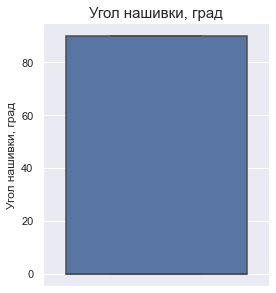

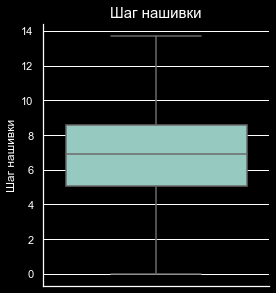

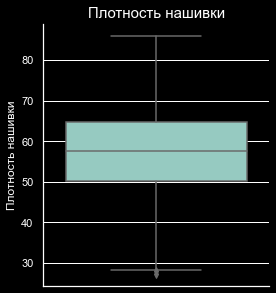

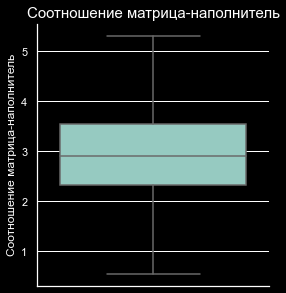

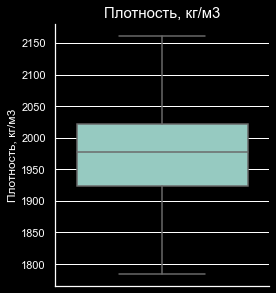

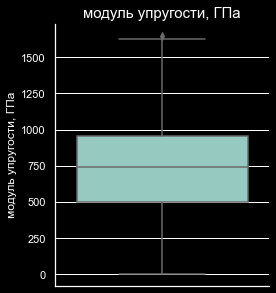

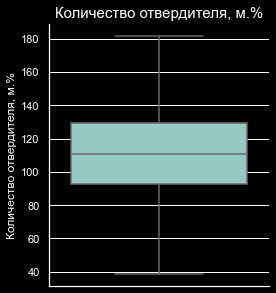

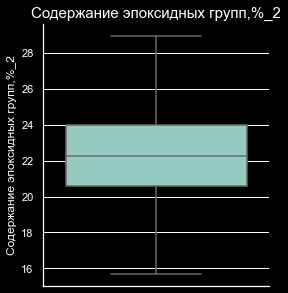

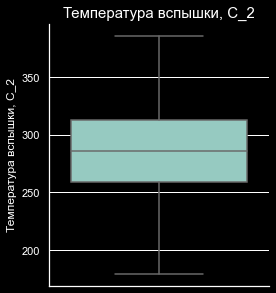

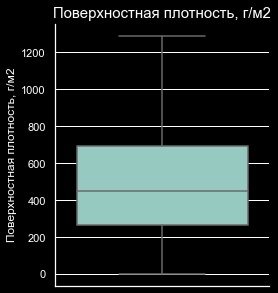

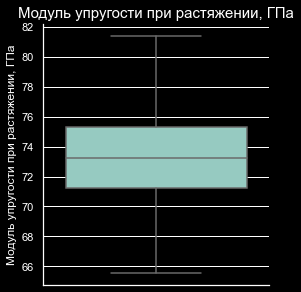

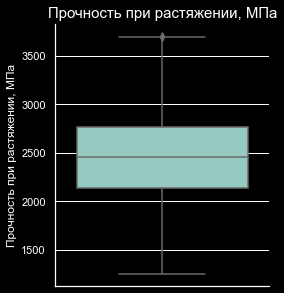

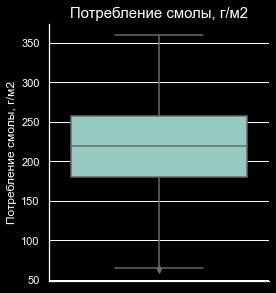

In [36]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box', height = 4)
    plt.title(col, fontsize=15)
    plt.style.use('dark_background')

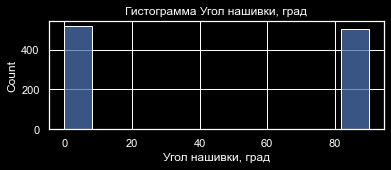

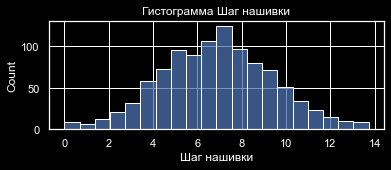

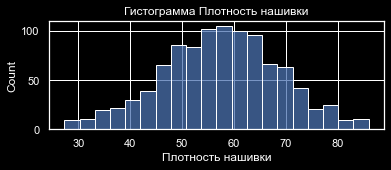

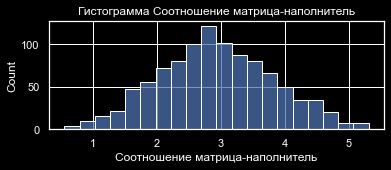

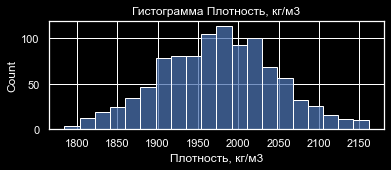

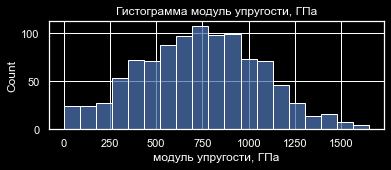

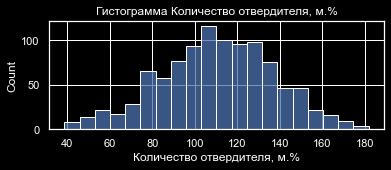

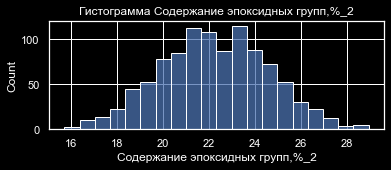

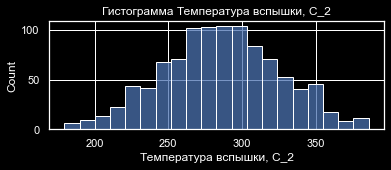

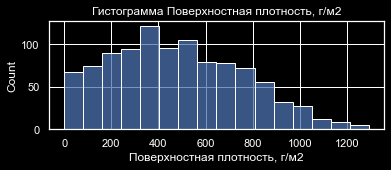

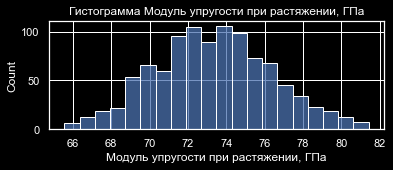

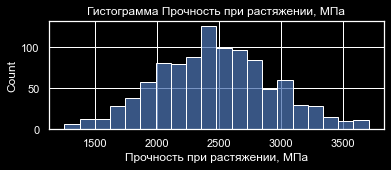

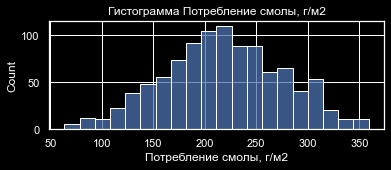

In [37]:
for col in df.columns: 
  plt.figure(figsize=(6, 2))
  plt.title("Гистограмма "+str(col))
  sns.histplot(data=df[col])
  plt.show()
  plt.style.use('dark_background')

In [38]:
df_used.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          936.000000   936.000000         936.000000   
mean            46.057692     6.915585          57.451895   
std             45.011619     2.509672          11.239331   
min              0.000000     0.037639          27.272928   
25%              0.000000     5.134988          50.209656   
50%             90.000000     6.943337          57.584225   
75%             90.000000     8.591450          64.798211   
max             90.000000    13.732404          86.012427   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          2.925683       1974.040023   
std                           0.893712         70.808120   
min                           0.547391       1784.482245   
25%                           2.321931       1923.443748   
50%                           2.904731       1977.258043   
75%                           3.546650       2020.158764   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean              738.247627                   110.916216   
std               328.708665                    27.037891   
min                 2.436909                    38.668500   
25%               498.577158                    92.523816   
50%               738.736842                   111.113175   
75%               958.418993                   130.001450   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                         22.209030                286.040414   
std                           2.394871                 39.400677   
min                          15.695894                179.374391   
25%                          20.571516                259.184486   
50%                          22.184713                286.024118   
75%                          23.961818                312.991425   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                      482.993901                             73.305127   
std                       280.190377                              3.037381   
min                         0.603740                             65.553336   
25%                       266.004099                             71.248823   
50%                       457.732246                             73.259230   
75%                       695.900862                             75.310788   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     936.000000               936.000000  
mean                     2467.488822               217.613374  
std                       463.838911                57.827255  
min                      1250.392802                63.685698  
25%                      2146.936034               179.489091  
50%                      2457.959767               218.388715  
75%                      2755.169485               256.396777  
max                      3705.672523               359.052220

После предобработки данных, мы избавились от выбросов

# Нормализация значений


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler() # Преобразование объектов путем масштабирования каждого объекта до заданного диапазона.

norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 

In [41]:
norm_df.describe() # MinMaxScaler преобразует значения от 0 до 1 


Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count         1023.000000  1019.000000        1002.000000   
mean             0.491691     0.500310           0.513109   
std              0.500175     0.184012           0.191678   
min              0.000000     0.000000           0.000000   
25%              0.000000     0.369753           0.389191   
50%              0.000000     0.503089           0.514876   
75%              1.000000     0.625061           0.639569   
max              1.000000     1.000000           1.000000   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1017.000000       1014.000000   
mean                          0.498844          0.504592   
std                           0.187743          0.188703   
min                           0.000000          0.000000   
25%                           0.371694          0.370348   
50%                           0.494885          0.511740   
75%                           0.629989          0.627148   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1021.000000                  1009.000000   
mean                0.446445                     0.502162   
std                 0.198408                     0.187526   
min                 0.000000                     0.000000   
25%                 0.301254                     0.376848   
50%                 0.447195                     0.502210   
75%                 0.579825                     0.634071   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1021.000000               1015.000000   
mean                          0.493679                  0.515619   
std                           0.178883                  0.191155   
min                           0.000000                  0.000000   
25%                           0.370514                  0.386259   
50%                           0.492854                  0.515364   
75%                           0.623402                  0.645360   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1021.000000                           1017.000000   
mean                        0.372145                              0.489020   
std                         0.215900                              0.192365   
min                         0.000000                              0.000000   
25%                         0.205998                              0.359264   
50%                         0.349188                              0.486101   
75%                         0.535870                              0.616700   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1012.000000              1015.000000  
mean                        0.495005                 0.522725  
std                         0.190612                 0.196058  
min                         0.000000                 0.000000  
25%                         0.362249                 0.393004  
50%                         0.491825                 0.526442  
75%                         0.614908                 0.654851  
max                         1.000000                 1.000000

In [42]:
norm_df.head(5) # MinMaxScaler преобразует значения от 0 до 1 

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0.0                 0.0     0.291282           0.506083   
1.0                 0.0     0.291282           0.557156   
2.0                 0.0     0.291282           0.727399   
3.0                 0.0     0.364102           0.335840   
4.0                 0.0     0.364102           0.506083   

     Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         0.274768          0.651097               0.447061   
1.0                         0.274768          0.651097               0.447061   
2.0                         0.274768          0.651097               0.447061   
3.0                         0.274768          0.651097               0.447061   
4.0                         0.466552          0.651097               0.455721   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                          NaN                         0.495653   
1.0                     0.079153                         0.607435   
2.0                     0.078454                              NaN   
3.0                     0.630983                         0.418887   
4.0                     0.511257                         0.495653   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                       NaN                        0.16223   
1.0                  0.509164                        0.16223   
2.0                  0.509164                        0.16223   
3.0                  0.583596                        0.16223   
4.0                  0.509164                        0.16223   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                              0.280303                        0.71259   
1.0                              0.280303                        0.71259   
2.0                              0.280303                        0.71259   
3.0                              0.280303                        0.71259   
4.0                              0.280303                        0.71259   

     Потребление смолы, г/м2  
0.0                 0.529221  
1.0                 0.529221  
2.0                 0.529221  
3.0                 0.529221  
4.0                 0.529221

In [43]:
df_scaled = preprocessing.scale(df_used)
df_scaled

array([[-1.024, -1.162,  0.227, ..., -1.089,  1.149,  0.041],
       [-1.024, -0.764, -0.93 , ..., -1.089,  1.149,  0.041],
       [-1.024, -0.764, -0.04 , ..., -1.089,  1.149,  0.041],
       ...,
       [ 0.977, -1.098,  0.906, ...,  0.471,  0.422,  0.329],
       [ 0.977, -0.24 ,  0.072, ...,  0.243, -0.854, -0.354],
       [ 0.977, -0.334,  1.779, ...,  0.331,  0.839, -0.396]])

Датасет стандартизован.


In [44]:
from sklearn.decomposition import PCA # метод анализа главных компонент (PCA – principal component analysis

Расчитываем флияние 90 процентов факторов

In [45]:
pca = PCA(n_components=.9)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.09  0.088 0.087 0.084 0.084 0.08  0.078 0.076 0.075 0.07  0.067 0.063]


Влияние слабое - определим весы характеристик дата фрейма для первых пяти факторов, в установленом порядке добавляя по одному фактору. Fit изучает некоторые величины из данных, самое главное - "компоненты" и "объясненную дисперсию".:

In [46]:
print (pca.components_) #The fit learns some quantities from the data, most importantly the "components" and "explained variance":

[[-0.203 -0.168 -0.435 -0.426  0.102 -0.444 -0.12  -0.045 -0.279  0.043
  -0.211 -0.222 -0.402]
 [-0.178 -0.308  0.227  0.088  0.121  0.081 -0.507 -0.065 -0.399 -0.439
  -0.02   0.424 -0.014]
 [-0.034  0.024  0.458  0.088  0.651  0.186  0.05  -0.223 -0.108  0.203
  -0.211 -0.362 -0.204]
 [-0.628 -0.035 -0.252  0.271 -0.054  0.17   0.221 -0.267  0.231 -0.18
  -0.46   0.009  0.137]
 [ 0.351 -0.113  0.239 -0.295 -0.335  0.162  0.316 -0.339  0.065 -0.197
  -0.334  0.217 -0.407]
 [ 0.094  0.706  0.048  0.325 -0.248 -0.14  -0.197  0.069 -0.296 -0.165
  -0.312 -0.137 -0.169]
 [-0.012  0.312 -0.017 -0.238  0.004 -0.095 -0.45  -0.685  0.28   0.179
   0.128  0.114  0.159]
 [ 0.228 -0.193 -0.102  0.373  0.022 -0.267  0.071 -0.128 -0.223  0.576
  -0.309  0.42   0.121]
 [ 0.219 -0.146  0.242 -0.004  0.112 -0.617  0.083 -0.043  0.187 -0.396
  -0.223 -0.196  0.437]
 [ 0.032  0.141 -0.002 -0.121  0.3   -0.025 -0.254  0.457  0.553  0.032
  -0.347  0.359 -0.211]
 [ 0.136  0.169 -0.145 -0.488  0.112  0.3

In [47]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.09  0.088 0.087 0.084 0.084 0.08  0.078 0.076 0.075 0.07  0.067 0.063]


In [48]:
pca.singular_values_ 

array([33.123, 32.807, 32.558, 32.047, 31.901, 31.109, 30.779, 30.404,
       30.209, 29.233, 28.485, 27.627])

In [49]:
pca.explained_variance_ratio_ 

array([0.09 , 0.088, 0.087, 0.084, 0.084, 0.08 , 0.078, 0.076, 0.075,
       0.07 , 0.067, 0.063])

In [50]:
qwe = pca.transform(df_scaled) 

In [51]:
qwe

array([[ 1.063,  2.634, -0.126, ...,  1.78 ,  0.76 , -0.207],
       [ 1.087,  0.68 , -0.308, ...,  0.836,  0.803,  0.643],
       [ 0.409,  1.424,  0.112, ...,  0.849,  0.356,  0.492],
       ...,
       [-0.196,  0.424, -0.   , ..., -0.398, -0.285,  0.226],
       [-0.133, -0.845,  1.732, ..., -1.008, -0.521, -0.435],
       [-1.366, -0.519, -0.681, ...,  0.877, -1.274,  0.829]])

In [52]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

In [53]:
pd.DataFrame(fa.components_, columns=df.columns) 

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.078305    -0.041198          -0.286303   
1           -0.061106    -0.106946           0.095974   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.189805         -0.032448              -0.230924   
1                        -0.015424          0.042396              -0.010701   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -0.024492                         0.014458   
1                    -0.251202                        -0.029670   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -0.082455                       0.050451   
1                 -0.243422                      -0.139492   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.057812                      -0.098990   
1                             -0.029708                       0.135413   

   Потребление смолы, г/м2  
0                -0.128382  
1                -0.062887

Для двух факторов выделить наименование и смысл нового фактора сложно.
Но можно увидеть высокие доли характеристик внутри факторов:

1. модуль упругости,ГПа,
3. Температура вспышки,С_2
4. Плотность нашивки

In [54]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

In [55]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.061701     0.014056          -0.624856   
1            0.141431     0.053536           0.325364   
2           -0.010453     0.019931           0.031909   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.058648         -0.413738              -0.088223   
1                         0.044589         -0.527438               0.076620   
2                        -0.003884         -0.112274              -0.041352   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.056836                         0.039016   
1                     0.168330                        -0.016906   
2                    -0.566423                        -0.008780   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.027455                       0.012214   
1                  0.050632                      -0.092400   
2                 -0.108346                      -0.109724   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.004166                       0.022593   
1                              0.024889                       0.095389   
2                              0.072339                       0.135587   

   Потребление смолы, г/м2  
0                 0.000170  
1                 0.019155  
2                 0.009298

Для трех факторов определить наименование и смысл нового фактора сложно.
Однако можно увидеть высокие доли характеристик внутри факторов:

1. Количество отвердителя, м.%
2. Плотность, кг/м3
3. Плотность нашивки

In [56]:
fa = FactorAnalysis(n_components=4)
fa.fit(df_scaled)

FactorAnalysis(n_components=4)

In [57]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.120244    -0.048363           0.220935   
1           -0.469949    -0.038434          -0.393359   
2            0.057936     0.009598           0.055925   
3            0.256765     0.001198          -0.268709   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.029813          0.581996               0.031755   
1                        -0.019148          0.016406              -0.071638   
2                        -0.007254         -0.097085              -0.041777   
3                        -0.151428          0.120485              -0.184513   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -0.146221                        -0.028341   
1                    -0.108426                        -0.002496   
2                    -0.484338                         0.000065   
3                    -0.058783                         0.063913   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -0.059310                       0.040166   
1                 -0.024403                      -0.022026   
2                 -0.120405                      -0.122759   
3                 -0.040257                       0.165013   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.019645                      -0.082034   
1                             -0.047283                      -0.026570   
2                              0.082003                       0.160390   
3                              0.034009                      -0.096676   

   Потребление смолы, г/м2  
0                 -0.01154  
1                 -0.00123  
2                  0.01010  
3                 -0.06613

Для четырех факторов определить наименование и смысл нового фактора сложно.
Однако можно увидеть высокие доли характеристик внутри факторов:

1. Количество отвердителя, м.%
2. Плотность, кг/м3
3. Плотность нашивки
4. Угол нашивки, град

In [58]:
fa = FactorAnalysis(n_components=5)
fa.fit(df_scaled)

FactorAnalysis(n_components=5)

In [59]:
pd.DataFrame(fa.components_, columns=df.columns)

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0           -0.045344     0.023740          -0.464679   
1           -0.276257    -0.051912          -0.348006   
2            0.050326     0.022971           0.089459   
3            0.345061     0.014931          -0.065990   
4            0.108646     0.066450          -0.060135   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -0.055361         -0.466212              -0.077806   
1                        -0.052945          0.316646              -0.103731   
2                         0.009164         -0.186568              -0.020311   
3                        -0.181296          0.049899              -0.137679   
4                         0.113633          0.050022               0.006893   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.109400                         0.036484   
1                    -0.255909                         0.008135   
2                    -0.469031                        -0.003833   
3                    -0.042965                         0.041817   
4                    -0.027459                         0.094634   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.046387                      -0.009079   
1                 -0.077190                       0.045416   
2                 -0.101622                      -0.143898   
3                 -0.062339                       0.138061   
4                  0.116177                       0.124048   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             -0.002607                       0.039742   
1                             -0.026902                      -0.065101   
2                              0.088561                       0.173818   
3                              0.043844                      -0.070154   
4                              0.173609                       0.003949   

   Потребление смолы, г/м2  
0                 0.004606  
1                -0.029680  
2                 0.027686  
3                -0.168875  
4                 0.309882

Для пяти факторов определить наименование и смысл нового фактора сложно.
Однако увидеть высокие доли характеристик внутри факторов:

1. Количество отвердителя, м.%
2. Плотность, кг/м3
3. Плотность нашивкиУгол нашивки, град
4. Потребление смолы, г/м2

После данной операции можно предположить, что такие характеристики, как: количество отвердителя, плотность нашивки, плотность, угол нашивки, потребление смолы - являются наиболее подходящими параметрами для построения моделей.

# Нормализация данных

In [60]:
mms = MinMaxScaler()
df_used_norm = pd.DataFrame(mms.fit_transform(df_used), columns=df_used.columns, index=df_used.index)

In [61]:
df_used_norm.describe() 

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count          936.000000   936.000000         936.000000   
mean             0.511752     0.502232           0.513776   
std              0.500129     0.183258           0.191342   
min              0.000000     0.000000           0.000000   
25%              0.000000     0.372211           0.390482   
50%              1.000000     0.504258           0.516029   
75%              1.000000     0.624604           0.638842   
max              1.000000     1.000000           1.000000   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                     936.000000               936.000000  
mean                        0.495706                 0.521141  
std                         0.188915                 0.195781  
min                         0.000000                 0.000000  
25%                         0.365149                 0.392067  
50%                         0.491825                 0.523766  
75%                         0.612874                 0.652447  
max                         1.000000                 1.000000

# Модель для прогноза модуля упругости при растяжении


In [62]:
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])

In [63]:
df_used_norm.columns 

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

 Выделим из датасета прогнозируемую (зависимую) переменную. И разделим выборку на обучающую и тестовую выборки, в соответствии с условием задачи 70/30

In [64]:
X = df_used_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_used_norm['Модуль упругости при растяжении, ГПа']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


# Линейная регрессия для модуля упругости при растяжении


Регрессия ищет отношения между переменными.
Включая одномерную линейную регрессию и множественную линейную регрессию, одномерный относится только к одному x и одному y. Существует базовое понимание линейной регрессии через унарный.

Одномерная линейная регрессия состоит в том, чтобы найти прямую линию в данных и подогнать данные с наименьшей ошибкой (потеря).

In [67]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

Wall time: 17 ms


# Случайный лес для модуля упругости при растяжении

In [68]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

Wall time: 31.1 s


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

In [69]:
model_RFR_1 = GSCV.best_estimator_

In [70]:
%%time
model_RFR_1.fit(X_train, y_train)

Wall time: 66 ms


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=20,
                      random_state=42)

In [71]:
model_RFR_1.predict(X_test)

array([0.486, 0.549, 0.512, 0.465, 0.494, 0.406, 0.505, 0.526, 0.508,
       0.524, 0.481, 0.462, 0.485, 0.513, 0.5  , 0.497, 0.503, 0.493,
       0.468, 0.508, 0.473, 0.481, 0.467, 0.487, 0.553, 0.486, 0.442,
       0.492, 0.492, 0.443, 0.487, 0.48 , 0.477, 0.484, 0.472, 0.49 ,
       0.465, 0.492, 0.508, 0.503, 0.487, 0.523, 0.486, 0.514, 0.477,
       0.522, 0.538, 0.481, 0.508, 0.501, 0.463, 0.501, 0.433, 0.502,
       0.478, 0.525, 0.513, 0.506, 0.498, 0.48 , 0.499, 0.486, 0.505,
       0.503, 0.464, 0.472, 0.517, 0.491, 0.474, 0.506, 0.45 , 0.483,
       0.473, 0.531, 0.497, 0.496, 0.474, 0.468, 0.51 , 0.464, 0.481,
       0.519, 0.483, 0.525, 0.498, 0.508, 0.52 , 0.485, 0.496, 0.513,
       0.525, 0.523, 0.485, 0.531, 0.5  , 0.51 , 0.474, 0.505, 0.495,
       0.524, 0.493, 0.491, 0.446, 0.532, 0.514, 0.496, 0.468, 0.493,
       0.472, 0.488, 0.518, 0.486, 0.486, 0.5  , 0.529, 0.484, 0.501,
       0.494, 0.544, 0.504, 0.471, 0.476, 0.494, 0.475, 0.478, 0.554,
       0.545, 0.511,

In [72]:
y_test

431.0    0.223731
45.0     0.655833
803.0    0.387603
674.0    0.585272
38.0     0.373538
           ...   
608.0    0.694506
487.0    0.536380
62.0     0.551152
399.0    0.433448
652.0    0.662165
Name: Модуль упругости при растяжении, ГПа, Length: 281, dtype: float64

In [73]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test))) 

0.16028678264867427

In [74]:
np.mean(np.abs(y_test-np.mean(y_test))) 

0.1586289003060272

# Линейгая регрессия для модели прогноза прочности при растяжении


In [75]:
X = df_used_norm.drop('Прочность при растяжении, МПа', axis=1)
y = df_used_norm['Прочность при растяжении, МПа']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [78]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

Wall time: 5 ms


# Случайный лес для для модели прогноза прочности при растяжении

In [79]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

Wall time: 30.2 s


{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 60}

In [80]:
 model_RFR_2 = GSCV.best_estimator_

In [81]:
%%time
model_RFR_2.fit(X_train, y_train)

Wall time: 115 ms


RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=60,
                      random_state=42)

In [82]:
 model_RFR_2.predict(X_test)

array([0.504, 0.492, 0.499, 0.533, 0.486, 0.492, 0.523, 0.522, 0.515,
       0.51 , 0.512, 0.48 , 0.493, 0.498, 0.503, 0.518, 0.474, 0.538,
       0.506, 0.513, 0.508, 0.477, 0.485, 0.511, 0.517, 0.501, 0.49 ,
       0.499, 0.509, 0.507, 0.523, 0.498, 0.5  , 0.496, 0.525, 0.499,
       0.474, 0.498, 0.514, 0.495, 0.494, 0.505, 0.481, 0.507, 0.518,
       0.509, 0.518, 0.505, 0.508, 0.49 , 0.492, 0.506, 0.52 , 0.496,
       0.5  , 0.498, 0.542, 0.491, 0.506, 0.494, 0.505, 0.49 , 0.498,
       0.481, 0.489, 0.473, 0.505, 0.513, 0.473, 0.523, 0.479, 0.514,
       0.474, 0.502, 0.519, 0.533, 0.49 , 0.509, 0.495, 0.501, 0.475,
       0.517, 0.514, 0.517, 0.482, 0.508, 0.508, 0.496, 0.496, 0.511,
       0.478, 0.483, 0.463, 0.514, 0.489, 0.503, 0.473, 0.475, 0.481,
       0.509, 0.475, 0.495, 0.532, 0.466, 0.523, 0.509, 0.508, 0.541,
       0.454, 0.506, 0.521, 0.477, 0.489, 0.509, 0.52 , 0.484, 0.512,
       0.451, 0.486, 0.473, 0.509, 0.497, 0.51 , 0.492, 0.458, 0.527,
       0.496, 0.488,

In [83]:
 y_test

431.0    0.140630
45.0     0.158646
803.0    0.583773
674.0    0.328720
38.0     0.606789
           ...   
608.0    0.543305
487.0    0.499028
62.0     0.655680
399.0    0.649320
652.0    0.539078
Name: Прочность при растяжении, МПа, Length: 281, dtype: float64

In [84]:
 np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.14989705044480384

In [85]:
 np.mean(np.abs(y_test-np.mean(y_test)))

0.14880406564050755

In [86]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_LN_1), get_metrics(model_RFR_1), get_metrics(model_LN_2), get_metrics(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

наименование модели  mean_absolute_error    r2_score
0  Линейная регрессия_МУ             0.148908  -37.247571
1       Случайный лес_МУ             0.149932  -47.374302
2  Линейная регрессия_ПР             0.150917  -32.786002
3       Случайный лес_ПР             0.149897 -107.726809

# Нейросеть для рекомендации соотношение матрица-наполнитель


In [87]:
df_used = df_used.reset_index(drop=True)
X = df_used.drop('Соотношение матрица-наполнитель', axis=1)
y = df_used['Соотношение матрица-наполнитель']

In [88]:
X

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
0                   0.0     4.000000          60.000000       2030.000000   
1                   0.0     5.000000          47.000000       2030.000000   
2                   0.0     5.000000          57.000000       2030.000000   
3                   0.0     5.000000          60.000000       2000.000000   
4                   0.0     5.000000          70.000000       1910.000000   
..                  ...          ...                ...               ...   
931                90.0     9.076380          47.019770       1952.087902   
932                90.0    10.565614          53.750790       2050.089171   
933                90.0     4.161154          67.629684       1972.372865   
934                90.0     6.313201          58.261074       2066.799773   
935                90.0     6.078902          77.434468       1890.413468   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
0               738.736842                    50.000000   
1               738.736842                   129.000000   
2               753.000000                   111.860000   
3               748.000000                   111.860000   
4               807.000000                   111.860000   
..                     ...                          ...   
931             912.855545                    86.992183   
932             444.732634                   145.981978   
933             416.836524                   110.533477   
934             741.475517                   141.397963   
935             417.316232                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          23.750000                284.615385   
1                          21.250000                300.000000   
2                          22.267857                284.615385   
3                          22.267857                284.615385   
4                          22.267857                284.615385   
..                               ...                       ...   
931                        20.123249                324.774576   
932                        19.599769                254.215401   
933                        23.957502                248.423047   
934                        19.246945                275.779840   
935                        27.474763                300.952708   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                       210.000000                             70.000000   
1                       210.000000                             70.000000   
2                       210.000000                             70.000000   
3                       210.000000                             70.000000   
4                       210.000000                             70.000000   
..                             ...                                   ...   
931                     209.198700                             73.090961   
932                     350.660830                             72.920827   
933                     740.142791                             74.734344   
934                     641.468152                             74.042708   
935                     758.747882                             74.309704   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                      3000.000000               220.000000  
1                      3000.000000               220.000000  
2                      3000.000000               220.000000  
3                      3000.000000               220.000000  
4                      3000.000000               220.000000  
..                             ...                      ...  
931                    2387.292495               125.007669  
932                    2360.392784               117.730099  
933                    2662.906040               236.606764  
934                    2071.715856           

In [89]:
y

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
931    2.271346
932    3.444022
933    3.280604
934    3.705351
935    3.808020
Name: Соотношение матрица-наполнитель, Length: 936, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [91]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [92]:
X_train

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
700                90.0     9.917468          53.197072       1870.970330   
331                 0.0     8.779019          43.709842       1948.417954   
46                  0.0     6.303773          72.152019       1987.259859   
277                 0.0     7.775213          61.420717       1895.084314   
787                90.0     9.670077          54.823989       1967.481344   
..                  ...          ...                ...               ...   
767                90.0    12.124311          49.725199       1978.941318   
72                  0.0     6.845036          49.753858       1949.454587   
908                90.0     8.784742          54.227573       1923.255135   
235                 0.0    10.199198          60.631701       1982.011195   
37                  0.0     7.856167          64.301964       1968.401388   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
700             498.194241                   133.702940   
331             798.311454                    91.218699   
46              403.395230                   112.719826   
277             539.966472                   151.843877   
787             846.448454                   107.207380   
..                     ...                          ...   
767            1117.484357                   116.796585   
72              638.939797                   114.528376   
908             763.917381                   139.248221   
235             814.622757                    91.493812   
37              455.871019                    61.421297   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
700                        20.865008                319.371724   
331                        20.627116                254.458479   
46                         19.390511                336.245384   
277                        21.630084                311.756871   
787                        18.083115                324.982919   
..                               ...                       ...   
767                        19.484366                288.247732   
72                         25.798830                281.114391   
908                        25.604559                246.852112   
235                        22.912466                268.503875   
37                         23.490723                316.414572   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
700                     675.284293                             75.004786   
331                     115.760106                             72.814830   
46                      352.831984                             73.016489   
277                     760.993126                             69.384017   
787                     267.147526                             67.728967   
..                             ...                                   ...   
767                     350.439454                             72.392051   
72                      293.444452                             76.836063   
908                     184.457314                             68.535599   
235                     805.136485                             73.097493   
37                      637.376893                             75.090372   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
700                    3116.574226               255.178647  
331                    3323.638821               104.137311  
46                     2016.503637               206.693379  
277                    2770.622771                97.401814  
787                    2574.603443               256.106133  
..                             ...                      ...  
767                    2460.997418               207.556171  
72                     2331.469527               147.007067  
908                    2331.299167               295.850430  
235                    2186.781209           

In [93]:
y_train 

700    4.232094
331    2.802618
46     3.057830
277    1.595285
787    1.019830
         ...   
767    2.893101
72     4.433176
908    3.824131
235    3.134842
37     3.034399
Name: Соотношение матрица-наполнитель, Length: 655, dtype: float64

In [94]:
goal = np.array(X_train)
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None)
goal_normalizer.adapt(goal)

In [95]:
goal

array([[  90.   ,    9.917,   53.197, ...,   75.005, 3116.574,  255.179],
       [   0.   ,    8.779,   43.71 , ...,   72.815, 3323.639,  104.137],
       [   0.   ,    6.304,   72.152, ...,   73.016, 2016.504,  206.693],
       ...,
       [  90.   ,    8.785,   54.228, ...,   68.536, 2331.299,  295.85 ],
       [   0.   ,   10.199,   60.632, ...,   73.097, 2186.781,  199.312],
       [   0.   ,    7.856,   64.302, ...,   75.09 , 2848.49 ,  311.052]])

In [96]:
goal_normalizer 

In [97]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(64, activation='relu'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [98]:
dnn_goal_model = build_and_compile_model(goal_normalizer)
dnn_goal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,844
Trainable params: 19,841
Non-trainable params: 3
_________________________________________________________________


In [99]:
%%time
history = dnn_goal_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 3.8157 - val_loss: 1.3345
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.9109 - val_loss: 0.8992
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8821 - val_loss: 0.9412
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8332 - val_loss: 0.8511
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.8117 - val_loss: 0.8458
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8050 - val_loss: 0.8290
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.8007 - val_loss: 0.8097
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7937 - val_loss: 0.7910
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7932 - val_loss: 0.8081
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7939 - val_loss: 0.8415
Epoch 11

In [100]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

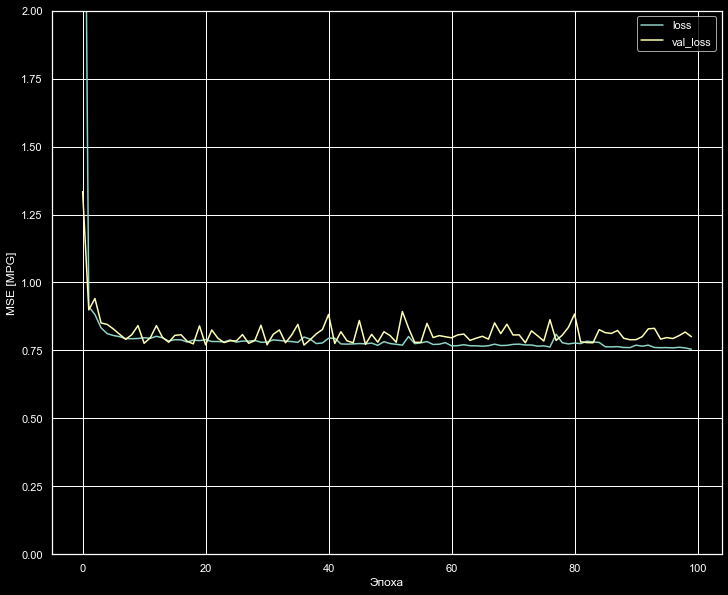

In [101]:
plot_loss(history) 

In [102]:
X_test 

Угол нашивки, град  Шаг нашивки  Плотность нашивки  Плотность, кг/м3  \
386                 0.0     3.930057          43.082373       2079.216323   
41                  0.0     7.656211          33.571024       1913.379677   
725                90.0     7.628923          52.488265       1940.875616   
605                90.0     0.305723          73.389838       2053.292814   
35                 90.0    10.000000          60.000000       2085.495837   
..                  ...          ...                ...               ...   
543                90.0    10.154591          63.195156       2050.006700   
433                 0.0    10.466131          82.525493       2087.646817   
57                  0.0     6.281150          72.292880       2019.065966   
355                 0.0     4.538571          63.561645       2095.716754   
584                90.0     7.921601          63.964181       1985.036094   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
386             516.439005                    77.330334   
41              822.918735                   143.576937   
725             813.505178                   108.267128   
605             985.791212                    59.207283   
35              931.310636                   110.564840   
..                     ...                          ...   
543            1137.892383                   136.038193   
433               4.339154                    76.784021   
57             1081.412660                   135.949276   
355             920.762817                   105.778668   
584            1194.709968                   151.216532   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
386                        24.799019                223.749031   
41                         24.275588                274.988794   
725                        23.655577                270.778521   
605                        22.403912                299.670865   
35                         23.487140                270.286765   
..                               ...                       ...   
543                        22.500389                275.196921   
433                        18.552220                258.302450   
57                         21.497303                362.877362   
355                        20.532135                244.476593   
584                        20.496931                354.013226   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
386                     402.943972                             69.102559   
41                      260.859341                             75.957329   
725                     799.826151                             71.702195   
605                     432.572807                             74.837967   
35                      278.230020                             71.479060   
..                             ...                                   ...   
543                    1230.465214                             76.570828   
433                      68.508119                             74.062349   
57                       34.488906                             74.296701   
355                     859.432338                             72.429467   
584                     201.130806                             76.057775   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  
386                    1595.679674               246.810874  
41                     1639.912525               248.244330  
725                    2683.718348               138.241717  
605                    2057.493213               143.693207  
35                     2740.229631               187.861373  
..                             ...                      ...  
543                    2584.359640               187.878352  
433                    2475.645729               237.850070  
57                     2860.270961               186.555662  
355                    2844.655510           

In [103]:
y_test.head(10)

386    3.318032
41     4.315666
725    3.149638
605    3.858755
35     2.444177
329    2.717755
692    3.272840
618    4.545326
430    2.647706
411    2.833719
Name: Соотношение матрица-наполнитель, dtype: float64

In [104]:
len(y_test) 

281

9/9 [==============================] - 0s 2ms/step


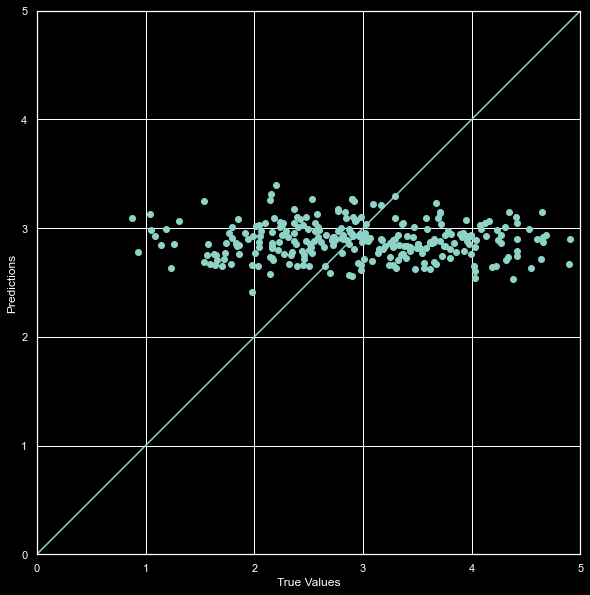

In [105]:
test_predictions = dnn_goal_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.style.use('dark_background')

In [106]:
test_predictions

array([2.936, 2.708, 2.804, 2.784, 3.025, 2.893, 2.822, 2.635, 2.651,
       3.152, 2.716, 2.995, 2.94 , 2.893, 2.673, 2.633, 2.802, 2.795,
       2.971, 2.72 , 2.765, 3.046, 3.249, 2.707, 2.916, 2.84 , 2.882,
       3.004, 2.816, 2.648, 2.862, 2.785, 2.859, 2.933, 2.865, 2.713,
       2.619, 2.754, 2.749, 2.996, 3.007, 2.931, 2.973, 2.941, 2.915,
       2.861, 2.836, 3.038, 2.981, 2.793, 2.919, 2.678, 2.925, 3.045,
       2.837, 2.968, 2.881, 2.982, 3.045, 3.009, 3.049, 2.755, 2.608,
       2.817, 2.948, 3.066, 2.976, 3.009, 2.798, 3.014, 2.887, 3.161,
       2.974, 2.932, 3.298, 2.838, 2.937, 2.679, 2.925, 2.985, 2.952,
       2.954, 3.181, 3.069, 2.743, 3.09 , 2.82 , 3.016, 2.76 , 2.763,
       2.894, 2.871, 2.689, 2.728, 2.893, 2.701, 3.075, 2.581, 2.556,
       2.655, 2.929, 3.215, 2.659, 2.721, 2.585, 3.101, 2.636, 2.649,
       2.409, 2.737, 2.855, 2.663, 2.853, 3.268, 3.006, 2.843, 2.904,
       2.88 , 3.246, 2.903, 2.888, 2.822, 2.94 , 2.718, 3.223, 3.091,
       2.65 , 3.271,

In [107]:
len(test_predictions) 

281

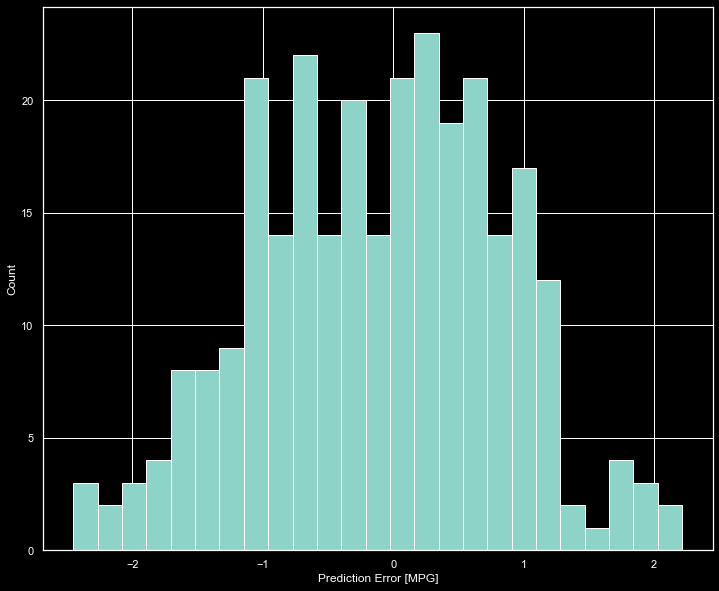

In [108]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')
plt.style.use('dark_background')